### **Loading the data and libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
sixcrypto = pd.read_csv(r"C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv") 
df=pd.DataFrame(sixcrypto)

## **Time-Series Forecasting-Simple Moving Average(SMA)**

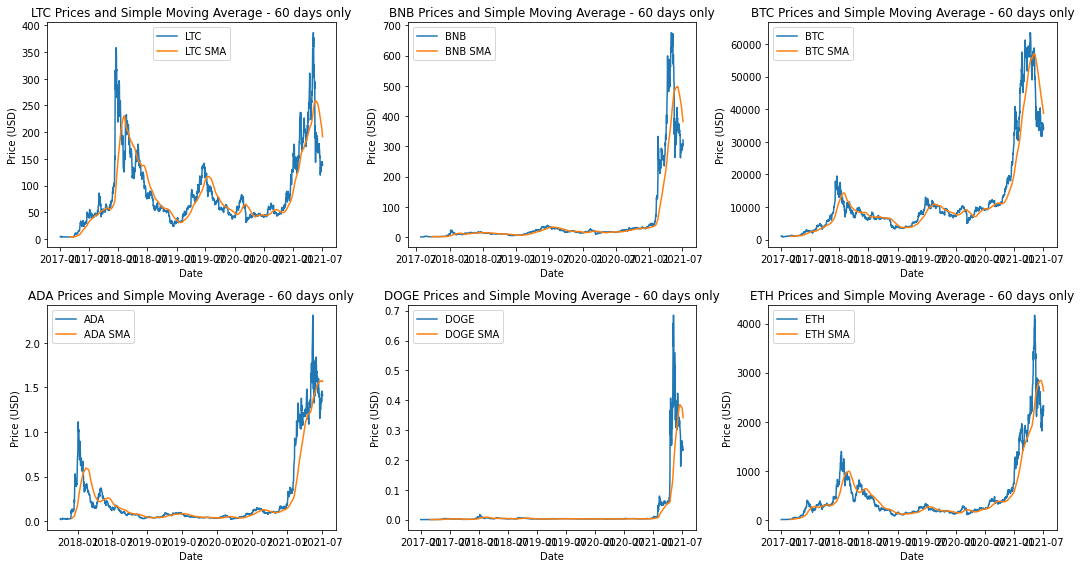

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Calculate the 30-day Simple Moving Average (SMA) for each currency
sma_litecoin = df_litecoin['Close'].rolling(window=60).mean()
sma_binance = df_binance['Close'].rolling(window=60).mean()
sma_bitcoin = df_bitcoin['Close'].rolling(window=60).mean()
sma_cardano = df_cardano['Close'].rolling(window=60).mean()
sma_dogecoin = df_dogecoin['Close'].rolling(window=60).mean()
sma_ethereum = df_ethereum['Close'].rolling(window=60).mean()

# Create a 2x3 grid of plots for each currency
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# Plot the time series data and the SMA for each currency in a separate plot
for i, (symbol, df_symbol, sma_symbol) in enumerate(zip(['LTC', 'BNB', 'BTC', 'ADA', 'DOGE', 'ETH'],
                                                       [df_litecoin, df_binance, df_bitcoin, df_cardano, df_dogecoin, df_ethereum],
                                                       [sma_litecoin, sma_binance, sma_bitcoin, sma_cardano, sma_dogecoin, sma_ethereum])):
    axs[i].plot(df_symbol['Close'], label=symbol)
    axs[i].plot(sma_symbol, label=f'{symbol} SMA')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].set_title(f'{symbol} Prices and Simple Moving Average - 60 days only')
    axs[i].legend()

plt.tight_layout()
plt.show()

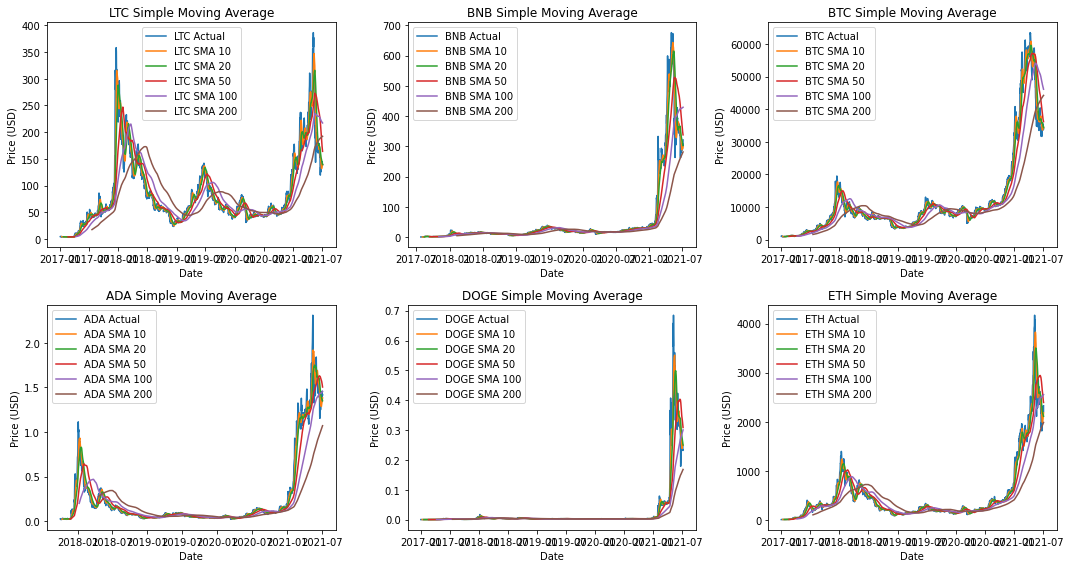

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a custom date parser function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%y')

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Create a 2x3 grid of plots for each currency
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# Plot the Simple Moving Averages and Actual Prices for each currency in a separate plot
for i, (symbol, df_symbol) in enumerate(zip(['LTC', 'BNB', 'BTC', 'ADA', 'DOGE', 'ETH'],
                                            [df_litecoin, df_binance, df_bitcoin, df_cardano, df_dogecoin, df_ethereum])):
    # Calculate Simple Moving Averages for the current currency
    sma_10 = calculate_sma(df_symbol['Close'], 10)
    sma_20 = calculate_sma(df_symbol['Close'], 20)
    sma_50 = calculate_sma(df_symbol['Close'], 50)
    sma_100 = calculate_sma(df_symbol['Close'], 100)
    sma_200 = calculate_sma(df_symbol['Close'], 200)

    axs[i].plot(df_symbol['Close'], label=f'{symbol} Actual')
    axs[i].plot(sma_10, label=f'{symbol} SMA 10')
    axs[i].plot(sma_20, label=f'{symbol} SMA 20')
    axs[i].plot(sma_50, label=f'{symbol} SMA 50')
    axs[i].plot(sma_100, label=f'{symbol} SMA 100')
    axs[i].plot(sma_200, label=f'{symbol} SMA 200')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].set_title(f'{symbol} Simple Moving Average')
    axs[i].legend()

plt.tight_layout()
plt.show()

### **Evaluation of SMA Model**

In [5]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    mape = np.mean(abs((data - sma) / data)) * 100
    return sma, mape

# Define a dictionary to store the results for each currency
results_30 = {}
results_60 = {}

# Calculate Simple Moving Averages, errors, and MAPE for each currency for both 30 and 60 day periods
for symbol in df['Symbol'].unique():
    df_curr = df[df['Symbol'] == symbol]
    sma_30, mape_30 = calculate_sma(df_curr['Close'], 30)
    mse_30 = np.mean((sma_30 - df_curr['Close']) ** 2)
    mae_30 = np.mean(abs(sma_30 - df_curr['Close']))
    rmse_30 = np.sqrt(mse_30)
    results_30[symbol] = {'MSE': mse_30, 'MAE': mae_30, 'RMSE': rmse_30, 'MAPE': mape_30}
    
    sma_60, mape_60 = calculate_sma(df_curr['Close'], 60)
    mse_60 = np.mean((sma_60 - df_curr['Close']) ** 2)
    mae_60 = np.mean(abs(sma_60 - df_curr['Close']))
    rmse_60 = np.sqrt(mse_60)
    results_60[symbol] = {'MSE': mse_60, 'MAE': mae_60, 'RMSE': rmse_60, 'MAPE': mape_60}

# Print out the results in a tabular format
print("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format('Currency', 'MSE (30 day)', 'MAE (30 day)', 'RMSE (30 day)', 'MAPE (30 day)', 'MSE (60 day)', 'MAE (60 day)', 'RMSE (60 day)', 'MAPE (60 day)'))
for symbol in results_30:
    print("{:<15} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f} {:<15.10f}".format(symbol, results_30[symbol]['MSE'], results_30[symbol]['MAE'], results_30[symbol]['RMSE'], results_30[symbol]['MAPE'], results_60[symbol]['MSE'], results_60[symbol]['MAE'], results_60[symbol]['RMSE'], results_60[symbol]['MAPE']))

Currency        MSE (30 day)    MAE (30 day)    RMSE (30 day)   MAPE (30 day)   MSE (60 day)    MAE (60 day)    RMSE (60 day)   MAPE (60 day)  
LTC             651.0176065067  13.8417116565   25.5150466687   14.3937015562   1190.2500117420 20.3998952670   34.5000001702   21.7935590141  
ADA             0.0113313243    0.0481830373    0.1064486931    17.9739128108   0.0243255183    0.0764471746    0.1559664011    28.0883166043  
BNB             1182.7233587541 10.6214267300   34.3907452486   15.8660634355   2564.4545633058 18.1319001012   50.6404439485   21.5974439049  
DOGE            0.0010242335    0.0068243710    0.0320036485    16.7138821360   0.0019923583    0.0097895620    0.0446358413    25.2165881524  
ETH             26358.9960465244 79.7710654671   162.3545381150  15.1856792136   52886.9139518670 118.1584317936  229.9715503097  22.5062667901  
BTC             6461706.4679676499 1320.5815027141 2541.9886836821 10.7873896747   16064760.4267840981 2191.2381493156 4008.0868786472

### **Feature imporatance of SMA Model**

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read CSV file into DataFrame
df1 = pd.read_csv('sixcrypto.csv')

# Select features and target variable for training models
train_df = df1[['Open', 'High', 'Low', 'Volume', 'Marketcap', 'Close']]

# Split features and target variable
X_train = train_df[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y_train = train_df['Close']

# Train RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Calculate feature importance for both models and store in DataFrames
rf_feat_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
gb_feat_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_model.feature_importances_})

# Combine feature importance DataFrames and print side by side
feat_importance = pd.merge(rf_feat_importance, gb_feat_importance, on='Feature', suffixes=('_RF', '_GB'))
print(feat_importance)

     Feature  Importance_RF  Importance_GB
0       Open       0.384148       0.147923
1       High       0.209124       0.375585
2        Low       0.362974       0.419900
3     Volume       0.000019       0.000005
4  Marketcap       0.043736       0.056587


### **Corrlation cofficient for SMA model**

In [74]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('sixcrypto.csv')

# Define window size for SMA
window_size = 60

# Create a dictionary to store correlation coefficients for each currency
corr_dict = {}

# Iterate over each currency in the dataset
for currency in df1['Symbol'].unique():
    
    # Select rows for the current currency
    curr_df = df1[df1['Symbol'] == currency].copy()
    
    # Calculate the SMA with window size of 60 days
    curr_df['SMA'] = curr_df['Close'].rolling(window_size).mean()

    # Generate predicted prices using SMA
    curr_df['Predicted'] = curr_df['SMA'].shift(1)

    # Drop the first row, since it has NaN values
    curr_df = curr_df.dropna()

    # Calculate the correlation between the predicted and actual prices
    corr = np.corrcoef(curr_df['Close'], curr_df['Predicted'])[0,1]
    
    # Store the correlation coefficient for the current currency in the dictionary
    corr_dict[currency] = corr

# Create a dataframe from the dictionary of correlation coefficients
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])

# Sort the dataframe by correlation coefficient in descending order
corr_df = corr_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the dataframe
print(corr_df)

      Correlation Coefficient
BTC                  0.951533
ETH                  0.935910
ADA                  0.929577
BNB                  0.899203
LTC                  0.848562
DOGE                 0.830772


### **Exponential Smoothing (ES)** 

                        MSE        RMSE         MAE      MAPE  \
Currency                                                        
Litecoin          66.108048    8.130686    3.873250  4.043157   
Cardano            0.001610    0.040121    0.014673  4.707509   
Binance Coin     115.148700   10.730736    2.896497  4.564376   
Dogecoin           0.000139    0.011805    0.002135  4.407408   
Ethereum        3040.757465   55.143064   22.106110  3.820580   
Bitcoin       624621.840578  790.330210  366.584262  2.868497   

              Correlation Coefficient  
Currency                               
Litecoin                     0.992513  
Cardano                      0.995194  
Binance Coin                 0.995667  
Dogecoin                     0.988990  
Ethereum                     0.996338  
Bitcoin                      0.998195  


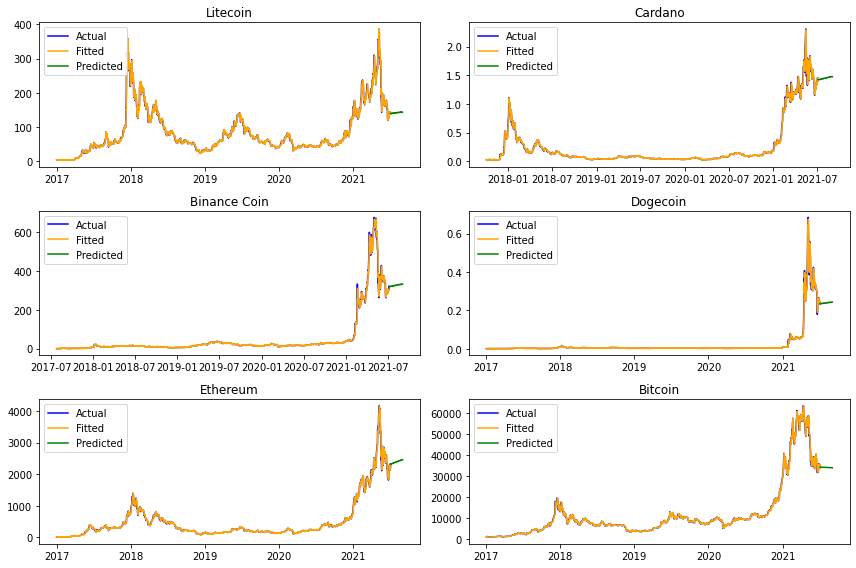

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings

# Load data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Create a copy of the DataFrame
df_copy = df.copy()

# Set the index of the copied DataFrame to a DatetimeIndex with daily frequency
df_copy.set_index('Date', inplace=True)
df_copy.index = pd.DatetimeIndex(df_copy.index)

# Convert DatetimeIndex to PeriodIndex with daily frequency
df_copy.index = pd.PeriodIndex(df_copy.index, freq='D')

# Define function to calculate ES model
def calc_es_model(data):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model = ExponentialSmoothing(data)
        fit = model.fit()
    mse = ((fit.resid ** 2).sum()) / len(fit.resid)
    rmse = np.sqrt(mse)
    mae = fit.resid.abs().sum() / len(fit.resid)
    mape = ((fit.resid.abs() / data) * 100).sum() / len(fit.resid)
    corr_coef = np.corrcoef(data, fit.fittedvalues)[0][1]
    return {'MSE': mse, 'RMSE': rmse,'MAE': mae, 'MAPE': mape, 'Correlation Coefficient': corr_coef}

# Calculate ES model for each currency
results = {}
for currency in df_copy['Name'].unique():
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    results[currency] = calc_es_model(currency_data)

# Display results in table
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Currency'
print(results_df)

# Apply SE model to each currency's time series data
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

for i, currency in enumerate(df_copy['Name'].unique()):
    currency_data = df_copy.loc[df_copy['Name'] == currency]['Close']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        se_model = ExponentialSmoothing(currency_data, seasonal_periods=12, trend='add', seasonal='add').fit()
        pred = se_model.forecast(steps=60) # predict next 60 days
    axs[i].plot(currency_data.index.to_timestamp(), currency_data, label='Actual', color='blue')
    axs[i].plot(currency_data.index.to_timestamp(), se_model.fittedvalues, label='Fitted', color='orange')
    axs[i].plot(pd.date_range(currency_data.index[-1].to_timestamp(), periods=60, freq='D'), pred, label='Predicted', color='green')
    corr_coef = np.corrcoef(currency_data, se_model.fittedvalues)[0][1]
    axs[i].set_title(currency)
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Read data from CSV file
df = pd.read_csv("sixcrypto.csv")

# Create a dictionary to store feature importance results
feature_importance = {"High": {}, "Low": {}, "Open": {}, "Volume": {}, "Marketcap": {}}

# Loop through each cryptocurrency
for symbol in df["Symbol"].unique():
    # Subset data for the current cryptocurrency
    subset = df[df["Symbol"] == symbol].reset_index(drop=True)
    
    # Split data into train and test sets
    train_size = int(len(subset) * 0.8)
    train_data = subset[:train_size]
    test_data = subset[train_size:]
    
    # Fit Exponential Smoothing model to train data
    es_model = ExponentialSmoothing(train_data["Close"])
    es_results = es_model.fit()
    
    # Get residuals from Exponential Smoothing model
    residuals = es_results.resid
    
    # Train random forest and gradient boosting models on residuals
    rf_model = RandomForestRegressor()
    gb_model = GradientBoostingRegressor()
    rf_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    gb_model.fit(train_data[["High", "Low", "Open", "Volume", "Marketcap"]], residuals)
    
    # Store feature importance results for the current cryptocurrency
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], rf_model.feature_importances_):
        feature_importance[feature][symbol+"_RF"] = importance
    for feature, importance in zip(["High", "Low", "Open", "Volume", "Marketcap"], gb_model.feature_importances_):
        feature_importance[feature][symbol+"_GB"] = importance

# Convert feature importance dictionary to dataframe
feature_importance_df = pd.DataFrame(feature_importance)

# Print feature importance results
print(feature_importance_df)

             High       Low      Open    Volume  Marketcap
LTC_RF   0.174286  0.137340  0.313726  0.157691   0.216957
LTC_GB   0.212404  0.114947  0.251316  0.188279   0.233053
ADA_RF   0.243900  0.108529  0.277818  0.103180   0.266574
ADA_GB   0.238717  0.047462  0.262095  0.108871   0.342855
BNB_RF   0.153425  0.160195  0.247286  0.225967   0.213126
BNB_GB   0.195293  0.147173  0.315612  0.166273   0.175648
DOGE_RF  0.143727  0.119811  0.366582  0.120351   0.249529
DOGE_GB  0.085349  0.072873  0.528445  0.085763   0.227571
ETH_RF   0.121944  0.149217  0.325824  0.102659   0.300356
ETH_GB   0.092504  0.111705  0.355762  0.068729   0.371300
BTC_RF   0.136625  0.136327  0.329860  0.117184   0.280005
BTC_GB   0.135725  0.127707  0.382155  0.052829   0.301584
